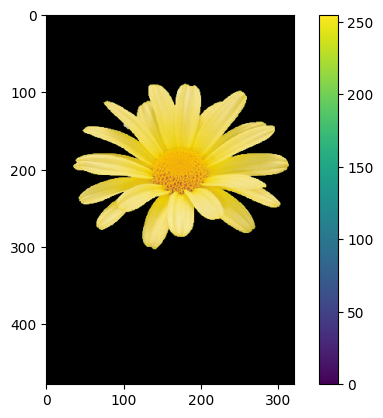

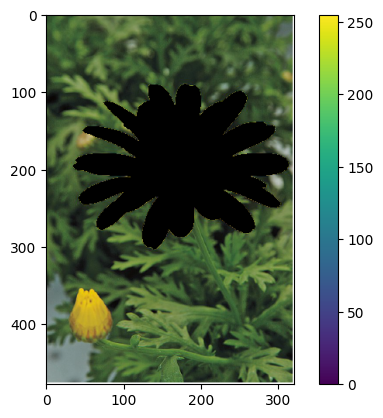

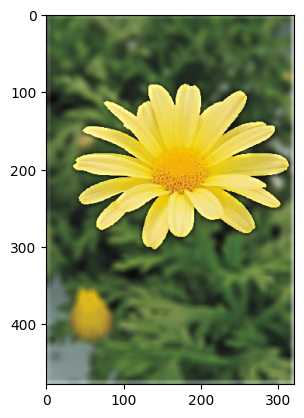

In [14]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('Capture.PNG',cv.IMREAD_COLOR)
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)

mask = np.zeros(img.shape[:2],np.uint8)  #mask similar to loaded image
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (20,50,450,290)  #region of interest
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT) #grabcut algorithm with 3 iterations using rectangular cut.
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img1 = img*mask2[:,:,np.newaxis] #foreground image
img2=img-img1  #background image

plt.imshow(img1)
plt.colorbar()
plt.savefig('Image1')
plt.show()

plt.imshow(img2)
plt.savefig('Image2')
plt.colorbar()
plt.show()

ksize = (10, 10)
  
# Using cv2.blur() method 
img3 = cv.blur(img2, ksize)  #blur the background image
image=cv.add(img1,img3) #adding the foreground image with blurred background
plt.imshow(image)
plt.savefig('Image3')
plt.show()